In [1]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('final_data_colors.csv')
df[df.duplicated()]
df.drop_duplicates(inplace=True)
df[df.duplicated()]
df['output'].value_counts()

output
Green     1457
Blue      1107
Pink       578
Purple     553
Brown      376
Yellow     285
Red        236
Orange     205
Grey       174
Black       51
White       29
Name: count, dtype: int64

In [2]:
df_0 = df[df['output'] == 'Green']
df_1 = df[df['output'] == 'Blue']
df_2 = df[df['output'] == 'Pink']
df_3 = df[df['output'] == 'Purple']
df_4 = df[df['output'] == 'Brown']
df_5 = df[df['output'] == 'Yellow']
df_6 = df[df['output'] == 'Red']
df_7 = df[df['output'] == 'Orange']
df_8 = df[df['output'] == 'Black']
df_9 = df[df['output'] == 'White']
df_10 =df[df['output'] == 'Grey']

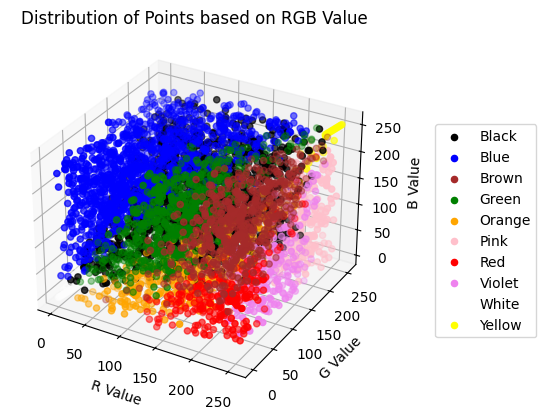

In [3]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_0['R'], df_0['G'], df_0['B'], color='black', marker='o', label='Black')
ax.scatter(df_1['R'], df_1['G'], df_1['B'], color='blue', marker='o', label='Blue')
ax.scatter(df_2['R'], df_2['G'], df_2['B'], color='brown', marker='o', label='Brown')
ax.scatter(df_3['R'], df_3['G'], df_3['B'], color='green', marker='o', label='Green')
ax.scatter(df_4['R'], df_4['G'], df_4['B'], color='orange', marker='o', label='Orange')
ax.scatter(df_5['R'], df_5['G'], df_5['B'], color='pink', marker='o', label='Pink')
ax.scatter(df_6['R'], df_6['G'], df_6['B'], color='red', marker='o', label='Red')
ax.scatter(df_7['R'], df_7['G'], df_7['B'], color='violet', marker='o', label='Violet')
ax.scatter(df_8['R'], df_8['G'], df_8['B'], color='white', marker='o', label='White')
ax.scatter(df_9['R'], df_9['G'], df_9['B'], color='yellow', marker='o', label='Yellow')

# Set labels
ax.set_xlabel('R Value')
ax.set_ylabel('G Value')
ax.set_zlabel('B Value')

ax.set_title('Distribution of Points based on RGB Value')

ax.legend(bbox_to_anchor=(1.15, 0.75), loc='upper left', borderaxespad=0.)

# Show plot
plt.show()

In [4]:
x = df.drop(['output'], axis='columns')
y = df.output
x.head()
y.head()

0     Blue
1    Brown
2    Green
3     Pink
4    Green
Name: output, dtype: object

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [9]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(x_train, y_train)
model_svm.score(x_test, y_test)

0.8941641938674579

In [10]:
y_pred = model_svm.predict(x_test)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Black       0.73      0.92      0.81        12
        Blue       0.93      0.95      0.94       222
       Brown       0.82      0.89      0.86        76
       Green       0.95      0.97      0.96       278
        Grey       0.80      0.75      0.77        32
      Orange       0.82      0.71      0.76        38
        Pink       0.89      0.86      0.88       125
      Purple       0.84      0.78      0.81       119
         Red       0.83      0.84      0.84        45
       White       0.86      0.67      0.75         9
      Yellow       0.90      0.84      0.87        55

    accuracy                           0.89      1011
   macro avg       0.85      0.84      0.84      1011
weighted avg       0.89      0.89      0.89      1011



In [13]:
import pickle
with open('color_recognition_model_svm.pickle','wb') as f:
    pickle.dump(model_svm, f)